### Latent space sampling - build superimposed learning curves
Intro:  
Purpose is to generate synthetic samples that fit within the distribution of each subtype  
within a given a given cancer (cohort) primary tumor type

In [ ]:
# VAE latent feature sampling method benchmarks
    # focus on one cancer (at a time)
        # adrenocortical and breast invasive carcinoma
    # make learning curves of input data (step one)
        # writing ACC and BRCA learning curves to i_o
    # superimpose decoded curves
    # superimpose curves derived from decoded synthetic latent samples 
    
    # ilustrate the concept of encoded samples having a label and a TCGA patient index
    # Develop method to assign synthetic TCGA patient index in same format

In [133]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

In [50]:
%whos

Variable                      Type                      Data/Info
-----------------------------------------------------------------
DecisionTreeClassifier        ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
RF_F1_dct                     dict                      n=1
RF_F1_scr                     float64                   0.7892156862745097
RF_clf                        RandomForestClassifier    RandomForestClassifier(max_depth=2)
RF_output                     list                      n=100
RandomForestClassifier        ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X                             DataFrame                               N:GEXP::ALB<...>n[50 rows x 5000 columns]
X_test                        DataFrame                               N:GEXP::ALB<...>n[17 rows x 5000 columns]
X_train                       DataFrame                               N:GEXP::ALB<...>n[33 rows x 5000 columns]
acc                

### Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

from statistics import mean
from statistics import stdev

In [3]:
import pandas as pd
import glob as glob

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statistics import mean
from statistics import stdev

### Setup

In [ ]:
plt_v = 18 # Plot set version for file naming
re_samp = 5 # Resample at 100%, to train-test splits
trn_tst_splts = 5

In [134]:
plt_v

18

In [136]:
re_samp

NameError: name 're_samp' is not defined

In [3]:
five_k = sorted(glob.glob('../g_devel/data_GEXP_5k_col_norm/*.tsv'))

In [135]:
five_k

['../g_devel/data_GEXP_5k_col_norm/ACC_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/BLCA_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/BRCA_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/CESC_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/COADREAD_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/ESCC_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/GEA_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/HNSC_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/KIRCKICH_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/KIRP_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/LIHCCHOL_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/LUAD_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/LUSC_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/MESO_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/OV_gexp_col_norm_5k.tsv',
 '../g_devel/data_GEXP_5k_col_norm/PAAD_gexp_co

In [168]:
brca_5k_across = pd.read_csv(five_k[2], sep="\t", index_col=0)

In [139]:
brca.index

Index(['TCGA-3C-AAAU', 'TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK',
       'TCGA-4H-AAAK', 'TCGA-5L-AAT0', 'TCGA-5T-A9QA', 'TCGA-A1-A0SD',
       'TCGA-A1-A0SE', 'TCGA-A1-A0SF',
       ...
       'TCGA-UL-AAZ6', 'TCGA-UU-A93S', 'TCGA-V7-A7HQ', 'TCGA-W8-A86G',
       'TCGA-WT-AB41', 'TCGA-WT-AB44', 'TCGA-XX-A899', 'TCGA-XX-A89A',
       'TCGA-Z7-A8R5', 'TCGA-Z7-A8R6'],
      dtype='object', name='BRCA', length=995)

In [140]:
synth_index = ['SYNTH-00001', 'SYNTH-00002']

In [141]:
synth_index

['SYNTH-00001', 'SYNTH-00002']

In [ ]:
[str(item).zfill(6) for item in data] # template

In [ ]:
[str(item).zfill(5) for item in list(range(0,995,))] # production

In [ ]:
synth_index = ['SYNTH-' + jtem  for jtem in [str(item).zfill(5) for item in list(range(0,995,))]]

In [151]:
acc_5k_across = pd.read_csv(five_k[0], sep="\t", index_col=0)

In [152]:
# to F1 mini-plot
    # focus-in on the most-comparable input / decoded ACC and BRCA
    # Feature set and classifier pairs

In [ ]:
RF_F1_dct = {}

In [ ]:
re_samp

In [14]:
brca.shape

(995, 5001)

In [ ]:
# within

### Main learning curve loop

In [105]:
df_to_rf = acc # DataFrame to Random Forest

RF_F1_dct = {}
RF_F1_means = {}
# for smp_sz in list(range(50, 251, 10)):
for smp_sz in list(range(15, 76, 5)):
    
    print(smp_sz)
    print(' ')
    
    stdev_lst = []
    mean_lst = []
    
    RF_output = []
    resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_rf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
        # print(RF_output)
        
        if len(RF_output) > 1:
            stdev_lst.append(stdev(RF_output))
            mean_lst.append(mean(RF_output))
        # Active learning insertion point    
           
    RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    RF_F1_dct[smp_sz] = RF_output
    # break

15
 
20
 
25
 
30
 
35
 
40
 
45
 
50
 
55
 
60
 
65
 
70
 
75
 


In [93]:
RF_F1_means.keys()

dict_keys([30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])

In [94]:
RF_F1_means

{30: 0.559,
 40: 0.612,
 50: 0.642,
 60: 0.665,
 70: 0.677,
 80: 0.671,
 90: 0.682,
 100: 0.682,
 110: 0.69,
 120: 0.685,
 130: 0.693,
 140: 0.69,
 150: 0.699,
 160: 0.702,
 170: 0.706,
 180: 0.698,
 190: 0.7,
 200: 0.692}

In [ ]:
# Plot learning curve

In [ ]:
df_to_rf

In [102]:
df_to_rf.index.name

'ACC'

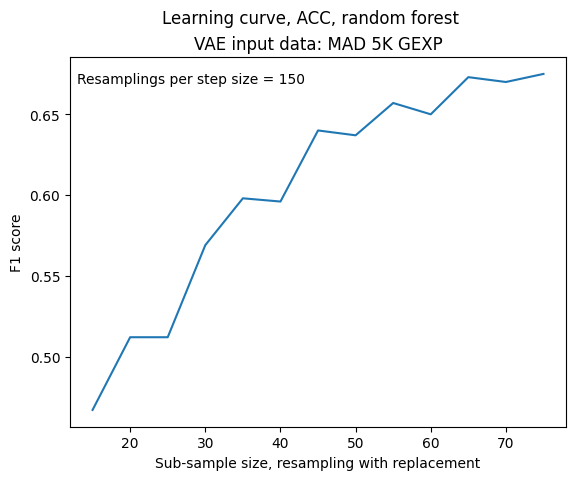

In [106]:
plt.plot(list(RF_F1_means.keys()),
       RF_F1_means.values(), label = 'Stndrd dvtn')
plt.suptitle('Learning curve, '+df_to_rf.index.name+', random forest')
plt.title('VAE input data: MAD 5K GEXP')
plt.ylabel('F1 score')
plt.xlabel('Sub-sample size, resampling with replacement')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.12, .85), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.savefig(
    'i_o/learning_curves/'+
    str(df_to_rf.index.name)+'_'+
    str(list(RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+str(resmpl_count)+'-rsmpls'+
    '_v2.png', bbox_inches = 'tight')

### Active learning

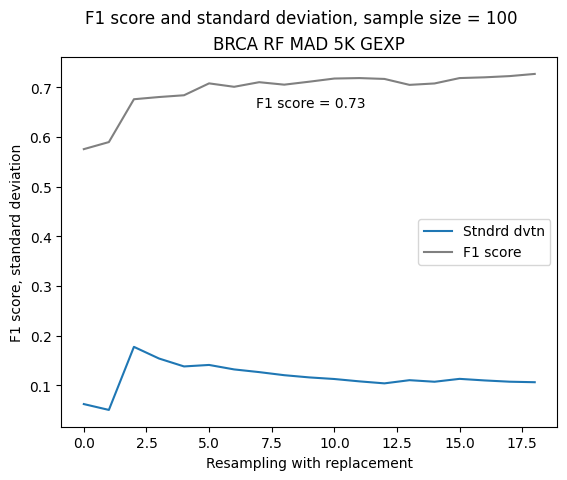

In [81]:
# Active learning
plt.plot(list(range(0, len(stdev_lst))),
        stdev_lst, label = 'Stndrd dvtn')
plt.plot(list(range(0, len(mean_lst))),
        mean_lst, color = 'grey', label = 'F1 score')
plt.suptitle('F1 score and standard deviation, sample size = ' + str(smp_sz))
plt.title('BRCA RF MAD 5K GEXP')
plt.ylabel('F1 score, standard deviation')
plt.xlabel('Resampling with replacement')
plt.annotate('F1 score = '+str(round(mean(RF_output),2)),
                xy=(.4, .8), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend()
plt.savefig(
    'i_o/standard_deviation_plots/'+
    str(brca.index.name)+'_'+str(smp_sz)+
    '_v1.png')

### Superimpose decoded samples, refer to slide deck to find a baseline training scheme?

In [ ]:
dec = pd.read_csv('decoded samples at each step size?

In [ ]:
# Decode the entire BRCA cohort either BLCA pretrained
    # (across-cohort MAD) for BRCA
    # with RF
    # LUSC?
# or decode entire BRCA cohort trained on BRCA with
    # within-cohort MAD feature set
    
# ACC - (?)

In [107]:
ls

c_latent_sampling.ipynb  i_o/


or train VAE on all samples,  
get the latent space, decode all,  
subset on decoded set,  
overlay curve (?)
sounds pretty good, run on acc and brca to start

In reviewing the slide deck, it looks like training a VAE on UVM 5k then decoding on ACC 5k boosts accuracy with random forest

In [ ]:
# train on all samples
    # what feature set?
    # not data_5k_stacked; this has across-cohort normalization
    # within-cohort MAD 5k: data_5k (also has within-cohort normalzation)
        # Done, these are in the mad5k_wthn_pths object below
    # across-cohort MAD 5k: data_GEXP_5k_col_norm (within-cohort normalzation)

In [108]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

In [ ]:
# okay, there are eight data directories in the devel folder, audit above
# Options:
    # reproduce the files here in the g_learning_curves dir
        # if necessary, skip for now
    # or just pull existing files for now from the g_devel dir
        # yes, go with this for now

In [ ]:
/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k

In [111]:
mad5k_wthn_pths = sorted(
    glob.glob(
        '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/*.tsv'))

In [112]:
mad5k_wthn_pths

['/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/ACC_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/BLCA_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/BRCA_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/CESC_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/COADREAD_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/ESCC_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/GEA_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/HNSC_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/KIRCKICH_mad_5k.tsv',
 '/Users/karlberb/Documents/work/sample_count/synthetic_TC

In [148]:
len(mad5k_wthn_pths)

25

In [114]:
mad5k_wthn_pths[0]

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/ACC_mad_5k.tsv'

In [115]:
mad5k_wthn_pths[-1]

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/UVM_mad_5k.tsv'

In [116]:
acc_5k_within = pd.read_csv(
    mad5k_wthn_pths[0], sep = '\t', index_col = 0)

In [171]:
brca_5k_within = pd.read_csv(
    mad5k_wthn_pths[2], sep = '\t', index_col = 0)

In [149]:
acc_5k_within

,Labels,N:GEXP::IGF2:3481:,N:GEXP::CYP17A1:1586:,N:GEXP::APOE:348:,N:GEXP::STAR:6770:,N:GEXP::GAPDH:2597:,N:GEXP::CYP21A2:1589:,N:GEXP::SPARC:6678:,N:GEXP::DHCR24:1718:,N:GEXP::CLU:1191:,...,N:GEXP::XPR1:9213:,N:GEXP::SOCS2:8835:,N:GEXP::LYRM2:57226:,N:GEXP::ASCC2:84164:,N:GEXP::HIST1H2AC:8334:,N:GEXP::PLAA:9373:,N:GEXP::RANBP2:5903:,N:GEXP::MED24:9862:,N:GEXP::USP38:84640:,N:GEXP::FCER1G:2207:
ACC,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1,ACC_2,0.179084,0.021923,0.038378,0.110853,0.163189,0.683056,0.112090,0.210168,0.107624,...,0.207113,0.215359,0.609831,0.646570,0.496937,0.198445,0.569751,0.626997,0.247482,0.137170
TCGA-OR-A5J2,ACC_2,0.179990,0.005302,0.009819,0.030127,0.126989,0.169569,0.205230,0.223519,0.033492,...,0.411381,0.487871,0.404681,0.371253,0.173060,0.383441,0.698380,0.559833,0.505962,0.037084
TCGA-OR-A5J3,ACC_3,0.021586,0.372870,0.031040,0.257731,0.762671,0.113664,0.122580,0.364356,0.214217,...,0.140122,0.033530,0.262031,0.438938,0.097858,0.371155,0.504601,0.486207,0.230106,0.023258
TCGA-OR-A5J5,ACC_3,0.107586,0.288308,0.009218,0.213982,0.359412,0.214880,0.113344,0.084705,0.013289,...,0.065116,0.156334,0.228564,0.578521,0.133438,0.467690,0.454723,0.490579,0.269186,0.056979
TCGA-OR-A5J6,ACC_1,0.472886,0.647770,0.252118,0.569321,0.128481,0.497277,0.106461,1.000000,0.366393,...,0.069593,0.382833,0.488645,0.312206,0.055606,0.387318,0.849407,0.765389,0.325657,0.215052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OU-A5PI,ACC_3,0.005338,0.092080,0.012522,0.147812,0.251259,0.123380,0.171407,0.502002,0.187673,...,0.174119,0.209830,0.332551,0.341123,0.673402,0.643094,0.493324,0.229620,0.414543,0.027137
TCGA-PA-A5YG,ACC_1,0.037978,0.000937,0.005917,0.137388,0.278676,0.016930,0.075882,0.076354,0.144661,...,0.292730,0.141426,0.303944,0.475887,0.047880,0.439540,0.591964,0.461640,0.204496,0.256497
TCGA-PK-A5H9,ACC_1,0.346736,0.150393,0.139675,0.169064,0.054403,0.001877,0.084531,0.117975,0.000963,...,0.322679,0.372852,0.259462,0.461793,0.185890,0.330767,0.785712,0.582427,0.471940,0.046053


In [ ]:
uvm_5k_within = pd.read_csv(
    mad5k_wthn_pths[-1], sep = '\t', index_col = 0)
uvm_5k_within

In [119]:
# run a VAE and a RF

In [120]:
ls

c_latent_sampling.ipynb              learning_curve_schematic.drawio
i_o/                                 learning_curve_schematic.drawio.png


### Schematic

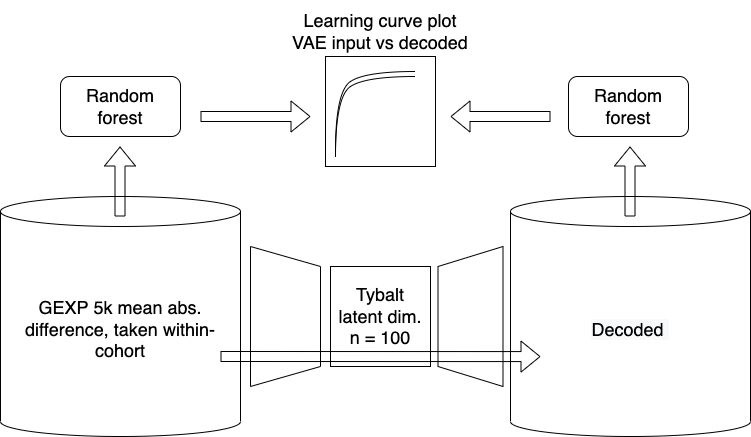

In [121]:
from IPython.display import Image
Image(filename='learning_curve_schematic.drawio.png') 

In [ ]:
# rationale for devel on MAD 5k genes taken from within each cohort:
# prioritizing within-cohort performance (accuracy and consistency)
# within each cohort to drive toward latent feature sampling scheme comparison

### VAE

In [123]:
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization, Activation, Layer
from tensorflow.keras import metrics, optimizers
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import Callback
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [150]:
%whos

Variable                      Type                      Data/Info
-----------------------------------------------------------------
Activation                    type                      <class 'keras.layers.core.activation.Activation'>
BatchNormalization            type                      <class 'keras.layers.norm<...>tion.BatchNormalization'>
Callback                      type                      <class 'keras.callbacks.Callback'>
CustomVariationalLayer        type                      <class '__main__.CustomVariationalLayer'>
DecisionTreeClassifier        ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
Image                         type                      <class 'IPython.core.display.Image'>
K                             TFModuleWrapper           <module 'tensorflow.compa<...>ras/backend/__init__.py'>
Layer                         type                      <class 'keras.engine.base_layer.Layer'>
Model                         type              

In [125]:
# Function set for leave one out loop
def compute_latent(x): # x:
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim), mean=0., stddev=1.0 )
    return mu + K.exp(sigma/2)*eps

# Set custom layer , will need all this at start of shell script
class CustomVariationalLayer(Layer):
    """
    Define a custom layer
    """
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa

    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

#### EDA on within vs. across MAD feauture sets

In [159]:
col_bool = acc_5k_across.columns == acc_5k_within.columns

In [162]:
type(col_bool)

numpy.ndarray

In [165]:
np.count_nonzero(col_bool == True)

1

In [166]:
np.count_nonzero(col_bool == False)

5000

In [170]:
brca_5k_across

,Labels,N:GEXP::ALB:213:,N:GEXP::TG:7038:,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::KRT5:3852:,N:GEXP::KRT14:3861:,N:GEXP::KRT6A:3853:,N:GEXP::ADAM6:8755:,N:GEXP::SERPINA1:5265:,...,N:GEXP::C14orf1:11161:,N:GEXP::SMCHD1:23347:,N:GEXP::ARL2BP:23568:,N:GEXP::PITPNB:23760:,N:GEXP::KDM5A:5927:,N:GEXP::CNIH:10175:,N:GEXP::ACADS:35:,N:GEXP::YIPF2:78992:,N:GEXP::MEPCE:56257:,N:GEXP::PPARG:5468:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.000037,0.009340,0.031385,0.039359,0.000004,0.000000,0.000001,0.006549,0.046129,...,0.146733,0.378009,0.397913,0.142963,0.177385,0.151151,0.054435,0.171216,0.285434,0.008529
TCGA-3C-AALI,BRCA_4,0.000056,0.030875,0.101237,0.091098,0.001082,0.000731,0.000005,0.038961,0.028947,...,0.218348,0.148038,0.242784,0.267978,0.104376,0.202719,0.138612,0.143707,0.338390,0.067471
TCGA-3C-AALJ,BRCA_2,0.000010,0.026908,0.102118,0.102970,0.000007,0.000006,0.000000,0.019658,0.002073,...,0.170624,0.215088,0.274446,0.128449,0.098466,0.112884,0.128195,0.210542,0.172334,0.069492
TCGA-3C-AALK,BRCA_1,0.000038,0.028296,0.245417,0.116361,0.009403,0.010979,0.000183,0.015994,0.008146,...,0.266908,0.219373,0.197795,0.192867,0.113573,0.209570,0.050047,0.216727,0.178202,0.130405
TCGA-4H-AAAK,BRCA_1,0.000053,0.015375,0.233795,0.208902,0.007498,0.006769,0.000142,0.009210,0.004443,...,0.172783,0.221944,0.221994,0.250816,0.129642,0.147587,0.164222,0.254220,0.193535,0.020915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.000270,0.008408,0.151985,0.066331,0.002340,0.002423,0.000003,0.009339,0.001252,...,0.323407,0.133397,0.204383,0.218225,0.092523,0.313693,0.085056,0.161550,0.245442,0.077549
TCGA-XX-A899,BRCA_1,0.000014,0.007113,0.115542,0.087292,0.003768,0.002692,0.000110,0.008042,0.008191,...,0.096283,0.344518,0.211751,0.236458,0.174349,0.185939,0.144916,0.119365,0.122980,0.171991
TCGA-XX-A89A,BRCA_1,0.003056,0.004876,0.254498,0.150192,0.003515,0.003370,0.000086,0.080189,0.012612,...,0.097096,0.213312,0.294989,0.173609,0.149934,0.185313,0.229788,0.164834,0.184412,0.240940


In [172]:
brca_bool = brca_5k_across.columns == brca_5k_within.columns

In [173]:
np.count_nonzero(brca_bool == True)

6

In [ ]:
# four feature sets
# run VAE
# run RF again
# superimpose learning curve


In [ ]:
# Target outputs: loss_plots, latent_feature_objects, decoded

In [178]:
brca_5k_within.shape

(995, 5001)

In [179]:
brca_5k_within.index.name

'BRCA'

#### Cohort feature toggles

In [192]:
feature_set = 'mad_5k_within'
c = 'ACC'
fit_on = 'ACC'
decode_df = acc_5k_within

In [225]:
feature_set = 'mad_5k_across'
c = 'ACC'
fit_on = 'ACC'
decode_df = acc_5k_across

In [199]:
feature_set = 'mad_5k_across'
decode_df = brca_5k_across
c = brca_5k_across.index.name
fit_on = 'BRCA'

In [424]:
feature_set = 'mad_5k_within'
decode_df = brca_5k_within
c = brca_5k_within.index.name
fit_on = 'BRCA'

In [425]:
feature_set

'mad_5k_within'

In [426]:
decode_df

,Labels,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::COL1A2:1278:,N:GEXP::COL3A1:1281:,N:GEXP::ADAM6:8755:,N:GEXP::MGP:4256:,N:GEXP::IGFBP5:3488:,N:GEXP::SPARC:6678:,N:GEXP::LOC96610:96610:,...,N:GEXP::OGFRL1:79627:,N:GEXP::PMM2:5373:,N:GEXP::TATDN2:9797:,N:GEXP::SNAP23:8773:,N:GEXP::IMPACT:55364:,N:GEXP::C7orf68:29923:,N:GEXP::MST4:51765:,N:GEXP::SNAP29:9342:,N:GEXP::MMRN2:79812:,N:GEXP::AKR1B1:231:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.031385,0.039359,0.018842,0.031442,0.006549,0.003060,0.022639,0.020558,0.003330,...,0.008571,0.239441,0.124286,0.236286,0.237124,0.026086,0.082640,0.309121,0.080230,0.098363
TCGA-3C-AALI,BRCA_4,0.101237,0.091098,0.053656,0.071486,0.038961,0.001611,0.009053,0.040433,0.013666,...,0.013655,0.303725,0.169249,0.128776,0.091827,0.289617,0.010398,0.363113,0.101590,0.070110
TCGA-3C-AALJ,BRCA_2,0.102118,0.102970,0.051479,0.069342,0.019658,0.016429,0.009545,0.049109,0.027639,...,0.046515,0.584199,0.166972,0.167441,0.171672,0.042127,0.024604,0.183706,0.146704,0.117168
TCGA-3C-AALK,BRCA_1,0.245417,0.116361,0.128708,0.195194,0.015994,0.097137,0.023039,0.111954,0.015832,...,0.032716,0.333033,0.099449,0.249399,0.168550,0.046800,0.031078,0.315361,0.174845,0.061419
TCGA-4H-AAAK,BRCA_1,0.233795,0.208902,0.162215,0.238647,0.009210,0.088766,0.354656,0.123492,0.003744,...,0.036679,0.248053,0.131196,0.168916,0.267576,0.054275,0.039614,0.254699,0.107060,0.077553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.151985,0.066331,0.067384,0.068486,0.009339,0.016802,0.047206,0.056279,0.002394,...,0.097934,0.574945,0.102419,0.187534,0.116411,0.050844,0.007741,0.430293,0.060763,0.063427
TCGA-XX-A899,BRCA_1,0.115542,0.087292,0.066699,0.131443,0.008042,0.047529,0.018829,0.055552,0.005144,...,0.055228,0.222253,0.125060,0.289308,0.194704,0.120155,0.042872,0.294341,0.281497,0.078021
TCGA-XX-A89A,BRCA_1,0.254498,0.150192,0.130643,0.259711,0.080189,0.027200,0.066639,0.119086,0.018390,...,0.058108,0.392215,0.117537,0.293152,0.155238,0.073995,0.020824,0.220071,0.310483,0.121370


2022-11-23 09:27:48.939852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2022-11-23 09:27:49.269163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-23 09:27:49.361689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-23 09:27:49.811830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-23 09:27:50.139445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-23 09:27:50.230024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-23 09:27:51.860543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/karlberb/miniforge3/envs/tf_M1_py3dot9/lib/python3.9/site-packa

Decode ACC trained on ACC using MAD 5K taken within-cohort experiment done


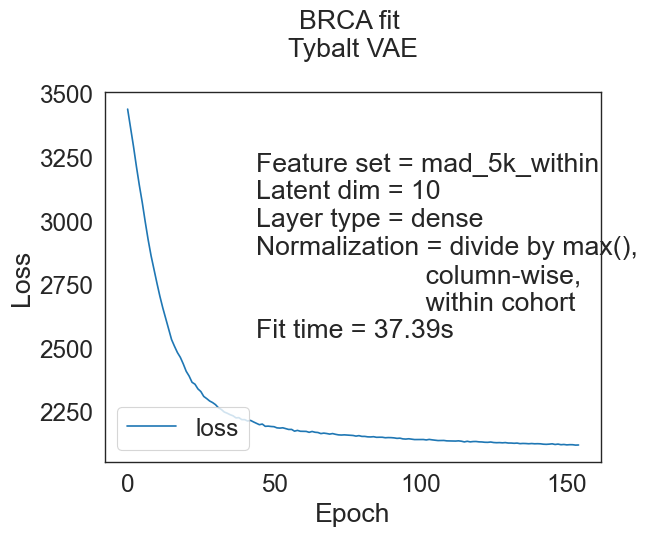

In [427]:
# ACC decode all samples after training on self with MAD 5k taken within cohort
# adapted from b_train-on-all.ipynb in g_devel

features = decode_df.columns[1:] # direct decode, will need fitting / dedoding frames

original_dim = len(features)
feature_dim = len(features)
latent_dim = 10

encoder_inputs = keras.Input(shape=(feature_dim,))
z_mean_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_1")(encoder_inputs)
z_mean_dense_batchnorm = layers.BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = layers.Activation('relu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_2")(encoder_inputs)
z_log_var_dense_batchnorm = layers.BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = layers.Activation('relu')(z_log_var_dense_batchnorm)

latent_space = layers.Lambda(compute_latent, output_shape=(latent_dim,), name="latent_space")([z_mean_encoded, z_log_var_encoded])

decoder_to_reconstruct = layers.Dense(feature_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
decoder_outputs = decoder_to_reconstruct(latent_space)

learning_rate = 0.0005
kappa = 1

beta = K.variable(0)

adam = optimizers.Adam(learning_rate=learning_rate)
vae_layer = CustomVariationalLayer()([encoder_inputs, decoder_outputs])
vae = Model(encoder_inputs, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta])

epochs=155

fit_start = time.time()
history = vae.fit(decode_df.iloc[:, 1:],  #       <-------- fit the VAE on object toggled here
            epochs=epochs, batch_size=50, shuffle=True,
            callbacks=[WarmUpCallback(beta, kappa)],
                 verbose=0 #  <---------------------- turn this on for production *************
                 )
fit_end = time.time() - fit_start

plt.plot(history.history['loss'],label="loss")

plt.title(
    c+' fit '+
    '\nTybalt VAE\n'
         )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('Feature set = '+feature_set+
             '\nLatent dim = '+str(latent_dim)+
             '\nLayer type = dense'+
             '\nNormalization = divide by max(),\n'+
             '                       column-wise,\n'+
             '                       within cohort'+
             '\nFit time = '+str(round(fit_end,2 ))+'s',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            )

plt.legend(loc="lower left")
plt.savefig(
    'i_o/'+c+'_'+
    'fit_on_'+fit_on+'_latent_dim.'+str(latent_dim)+
    # '_pltv-'+str(plt_v)+
    '_epochs.'+str(epochs)+'_'+
    feature_set+
    '.png', bbox_inches='tight') # version 18, norm within cohort
# plt.close()

encoder = Model(encoder_inputs, z_mean_encoded)
decoder_input = keras.Input(shape=(latent_dim, ))
_x_decoded_mean = decoder_to_reconstruct(decoder_input)
decoder = Model(decoder_input, _x_decoded_mean)

y_df = decode_df.Labels

decoded = pd.DataFrame(decoder.predict(encoder.predict(decode_df.iloc[:, 1:])),
                       index=decode_df.index, columns=decode_df.iloc[:, 1:].columns)

latent_object = pd.DataFrame(encoder.predict(decode_df.iloc[:, 1:]),
             index=decode_df.index,
                # columns=decode_df.iloc[:, 1:].columns # Columns are different because this is latent space
        )
latent_object.index.name = c
latent_object = pd.concat( [pd.DataFrame(y_df), latent_object] , axis =1)
latent_object.to_csv('i_o/'+c+'_fit_on.'+fit_on+
                     '_latent_object_latent_dim.'+str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+
    '.tsv',
    sep = '\t')
# break
decoded_labeled = pd.concat( [pd.DataFrame(y_df), decoded] , axis =1)
decoded_labeled.to_csv(
    'i_o/'+c+'_fit_on.'+fit_on+'_decoded_latent_dim.'+
    str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+
    '.tsv',
    sep = '\t')

print('Decode ACC trained on ACC using MAD 5K taken within-cohort experiment done')

In [132]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

In [ ]:
# End 2022-11-18 Friday
# working in g_learning_curves
# next action: check read-in on latent space

In [ ]:
lt_chk = pd.read_csv(

### RF again

In [212]:
decoded_labeled

,Labels,N:GEXP::ALB:213:,N:GEXP::TG:7038:,N:GEXP::COL1A1:1277:,N:GEXP::FN1:2335:,N:GEXP::KRT5:3852:,N:GEXP::KRT14:3861:,N:GEXP::KRT6A:3853:,N:GEXP::ADAM6:8755:,N:GEXP::SERPINA1:5265:,...,N:GEXP::C14orf1:11161:,N:GEXP::SMCHD1:23347:,N:GEXP::ARL2BP:23568:,N:GEXP::PITPNB:23760:,N:GEXP::KDM5A:5927:,N:GEXP::CNIH:10175:,N:GEXP::ACADS:35:,N:GEXP::YIPF2:78992:,N:GEXP::MEPCE:56257:,N:GEXP::PPARG:5468:
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.002023,0.019497,0.035983,0.041203,0.002049,0.001973,0.000195,0.003906,0.041912,...,0.131305,0.380643,0.328481,0.115748,0.202622,0.135027,0.103956,0.198963,0.281025,0.018244
TCGA-3C-AALI,BRCA_4,0.004586,0.014968,0.112190,0.083792,0.003696,0.003516,0.001485,0.075677,0.003680,...,0.213715,0.175868,0.262543,0.219410,0.134845,0.201502,0.095282,0.148617,0.222396,0.042294
TCGA-3C-AALJ,BRCA_2,0.002884,0.030373,0.138554,0.106642,0.006046,0.003698,0.001368,0.026137,0.006070,...,0.184961,0.184516,0.323978,0.152755,0.119581,0.146302,0.108194,0.173012,0.252728,0.102907
TCGA-3C-AALK,BRCA_1,0.001306,0.015748,0.234895,0.147973,0.010655,0.010026,0.002146,0.022013,0.006425,...,0.234188,0.166450,0.214096,0.213482,0.143978,0.208722,0.131184,0.198791,0.224361,0.066834
TCGA-4H-AAAK,BRCA_1,0.001139,0.013343,0.285334,0.207944,0.007462,0.008313,0.001574,0.018514,0.005285,...,0.154784,0.248751,0.201218,0.217249,0.164757,0.150543,0.141061,0.272362,0.228302,0.042101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,0.000519,0.009209,0.178580,0.083411,0.004819,0.004660,0.000693,0.024501,0.007319,...,0.335427,0.118346,0.222650,0.156199,0.081631,0.200338,0.147155,0.175695,0.253237,0.056484
TCGA-XX-A899,BRCA_1,0.005474,0.023038,0.102147,0.079319,0.014210,0.010781,0.002472,0.052311,0.019815,...,0.108181,0.353754,0.198160,0.241522,0.200151,0.188828,0.155300,0.155815,0.167012,0.198564
TCGA-XX-A89A,BRCA_1,0.008910,0.036006,0.283983,0.144914,0.015388,0.011478,0.003543,0.068392,0.013981,...,0.122463,0.214340,0.246324,0.210478,0.190688,0.175313,0.168632,0.207738,0.177710,0.202824


In [213]:
feature_set

'mad_5k_across'

In [215]:
df_to_clf = decoded_labeled # DataFrame to Random Forest

In [216]:
RF_F1_dct = {}
RF_F1_means = {}
DT_F1_means = {}
for smp_sz in list(range(20, 251, 10)):
# for smp_sz in list(range(15, 76, 5)):
    
    print(smp_sz)
    # print(' ')
    
    stdev_lst = []
    mean_lst = []
    
    RF_output = []
    DT_output = []
    resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        DT_clf = DecisionTreeClassifier()
        RF_clf.fit(X_train, y_train)
        DT_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        DT_F1_scr = f1_score(y_test, DT_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
        DT_output.append(RF_F1_scr)
        
        if len(RF_output) > 1:
            stdev_lst.append(stdev(RF_output))
            mean_lst.append(mean(RF_output)) # running mean for active learning
           
    RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    DT_F1_means[smp_sz] = round(mean(DT_output), 3)
    RF_F1_dct[smp_sz] = RF_output

20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250


In [204]:
df_to_rf.index.name

'BRCA'

In [ ]:
feature_set = 'mad_5k_across'
decode_df = brca_5k_across
c = brca_5k_across.index.name
fit_on = 'BRCA'

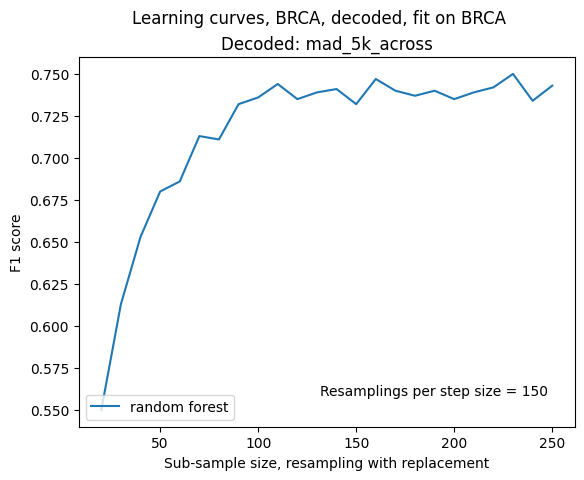

In [211]:
clf = 'random forest'
plt.plot(list(RF_F1_means.keys()),
       RF_F1_means.values(),label=clf)
plt.plot(list(DT_F1_means.keys()),
       RF_F1_means.values(),label='dt')
plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             df_to_rf.index.name)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Decoded: ' + feature_set) # across or within cohorts
plt.ylabel('F1 score')
plt.xlabel('Sub-sample size, resampling with replacement')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.5, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend(loc="lower left")
plt.savefig(
    'i_o/learning_curves/'+
    str(df_to_rf.index.name)+'_fit_on.'+fit_on +'_'+
    str(list(RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+str(resmpl_count)+'-rsmpls'+
    '_v4.png', bbox_inches = 'tight')

In [ ]:
# ^ superimpose input, decoded, and synthetic

In [ ]:
# read latent space object, fit PDF to one latent feature distribution
# subset by subtype and compare latent feature distribution stats

### Synthetic sample gen, production  
- Get a 10 dim latent feature object  
- Need to super impose input, decoded, and synthetic  
- Outline the cells  

#### Imports

In [ ]:
import scipy.stats
import seaborn as sns

#### Main

In [4]:
# Read latent object from file
lt_dm_10 = pd.read_csv(
    'i_o/dim10/BRCA_fit_on.BRCA_latent_object_latent_dim.10_epochs.155_mad_5k_within.tsv',
    sep = '\t', index_col = 0)

In [429]:
lt_dm_10

,Labels,0,1,2,3,4,5,6,7,8,9
BRCA,,,,,,,,,,,
TCGA-3C-AAAU,BRCA_1,0.562085,0.490768,0.000000,1.874362,3.068345,0.579502,2.949710,1.727223,2.129509,0.000000
TCGA-3C-AALI,BRCA_4,2.519901,1.002619,0.000000,0.000000,1.405262,0.236878,0.000000,3.946528,3.222590,0.041174
TCGA-3C-AALJ,BRCA_2,2.856601,0.000000,1.367948,0.000000,2.487773,0.000000,0.000000,3.766905,2.520005,0.000000
TCGA-3C-AALK,BRCA_1,1.557631,0.000000,1.555237,0.000000,1.822672,1.829829,1.196688,3.638763,0.000000,0.000000
TCGA-4H-AAAK,BRCA_1,1.208051,0.000000,2.190112,1.144623,2.127181,1.980219,0.679095,2.783095,0.000000,0.328545
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB44,BRCA_1,2.408631,0.000000,3.191171,0.000000,0.000000,0.000000,3.420868,4.073705,0.000000,0.000000
TCGA-XX-A899,BRCA_1,0.662445,0.328222,2.329464,0.746637,2.046764,3.058497,0.887192,1.812215,0.000000,0.000000
TCGA-XX-A89A,BRCA_1,0.697733,0.000000,1.979349,0.000000,0.418602,3.986051,0.110404,2.721759,0.000000,0.000000


BRCA_1
BRCA_4
BRCA_2
BRCA_3


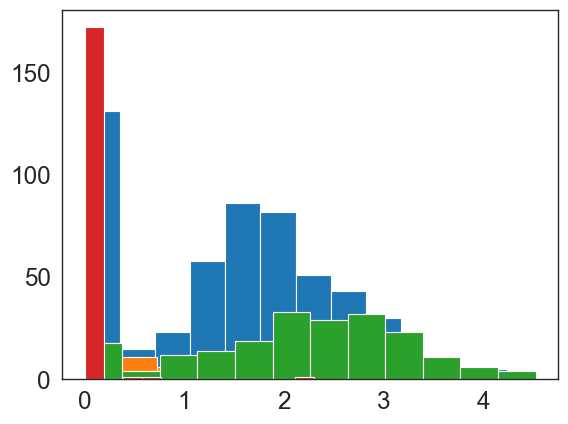

In [433]:
for subtype in lt_dm_10.Labels.unique():
    print(subtype)
    sub = lt_dm_10[lt_dm_10.Labels == subtype]
    plt.hist(sub['9'], bins = 12)
    plt.savefig('distsumm.png')

In [434]:
lt_dm_10.columns,

(Index(['Labels', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object'),)

In [ ]:
lt_dm_10

In [441]:
len(lt_dm_10[lt_dm_10.Labels == subtype][feature])

535

In [13]:
palette = {
          'LumA': '#0000CC',
          
           
          'LumB': '#00CCFF', 'Basal': '#CC0000','Her2': '#FF33FF'}

In [14]:
palette

{'LumA': '#0000CC', 'LumB': '#00CCFF', 'Basal': '#CC0000', 'Her2': '#FF33FF'}

In [18]:
list(palette.values())[0]

'#0000CC'

In [30]:
lt_dm_10.iloc[:, 1:].max().max()

8.476171

In [34]:
len(lt_dm_10[lt_dm_10.Labels == subtype])

80

BRCA_1
BRCA_2
BRCA_3
BRCA_4


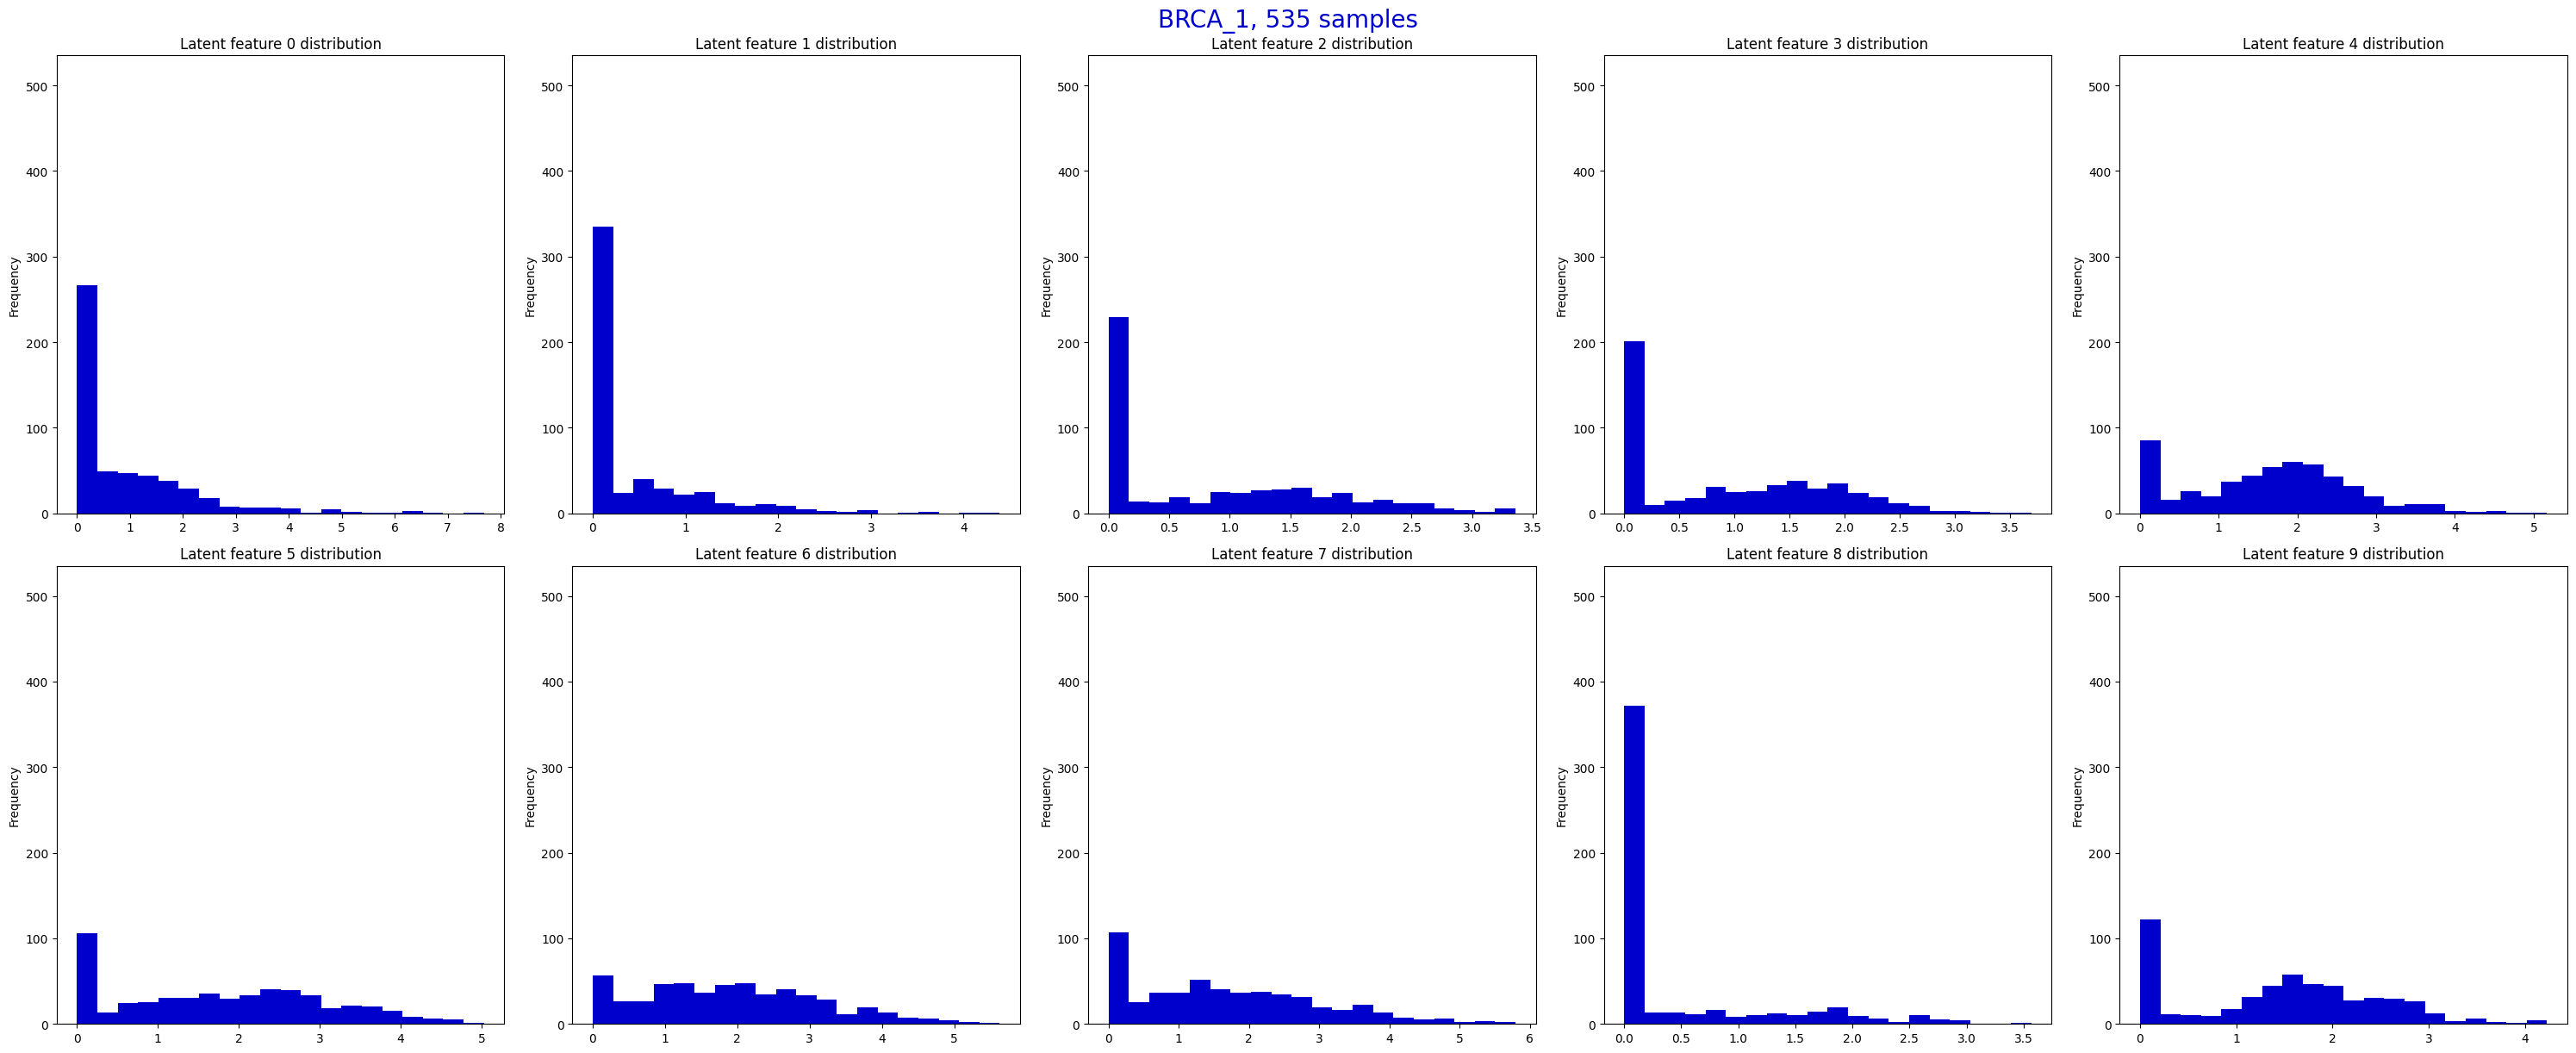

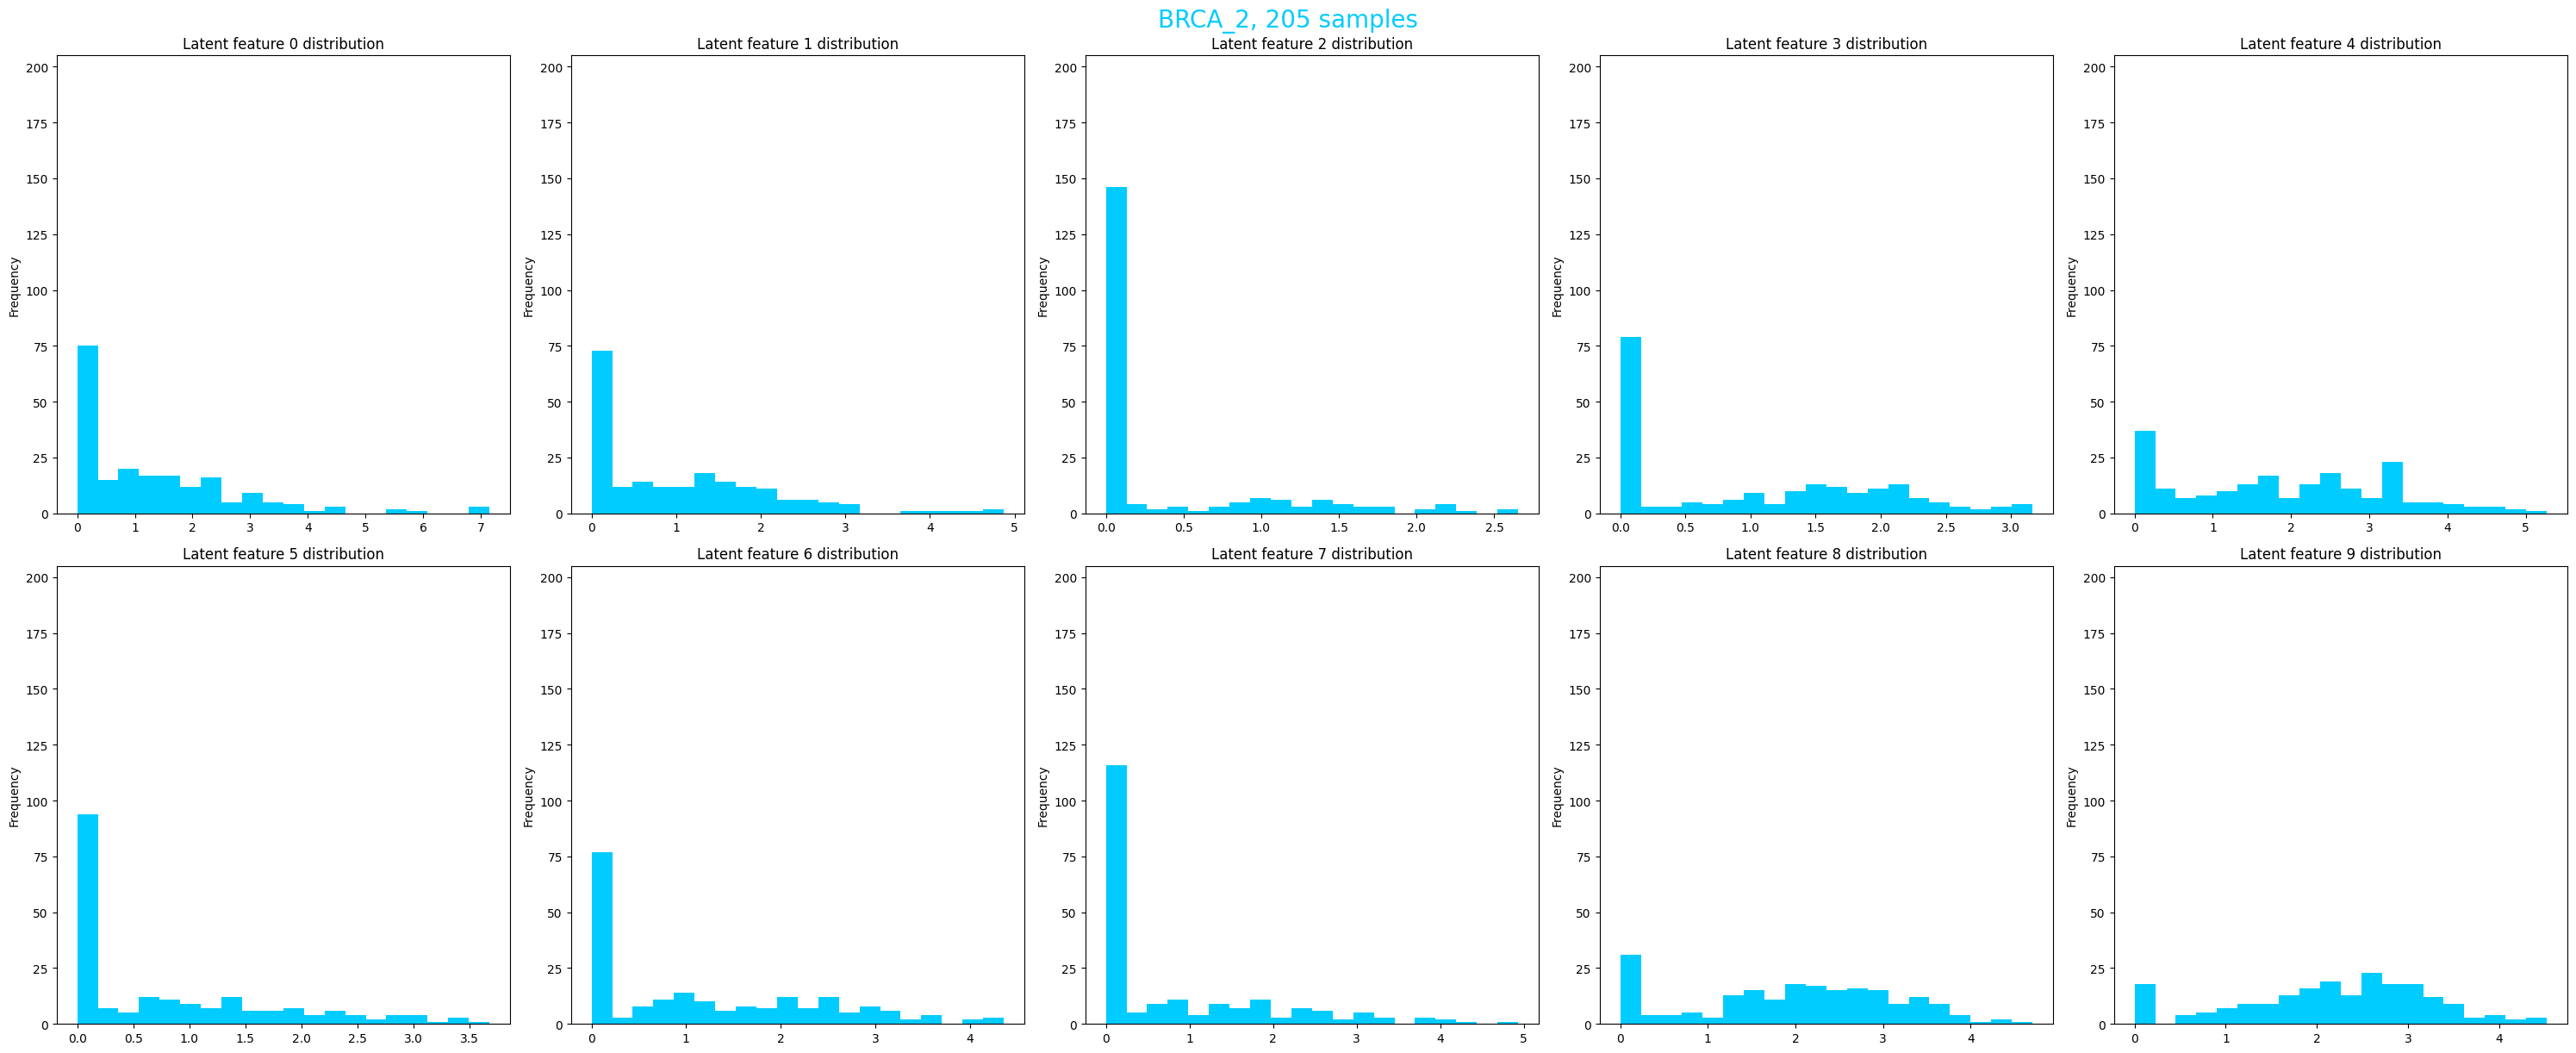

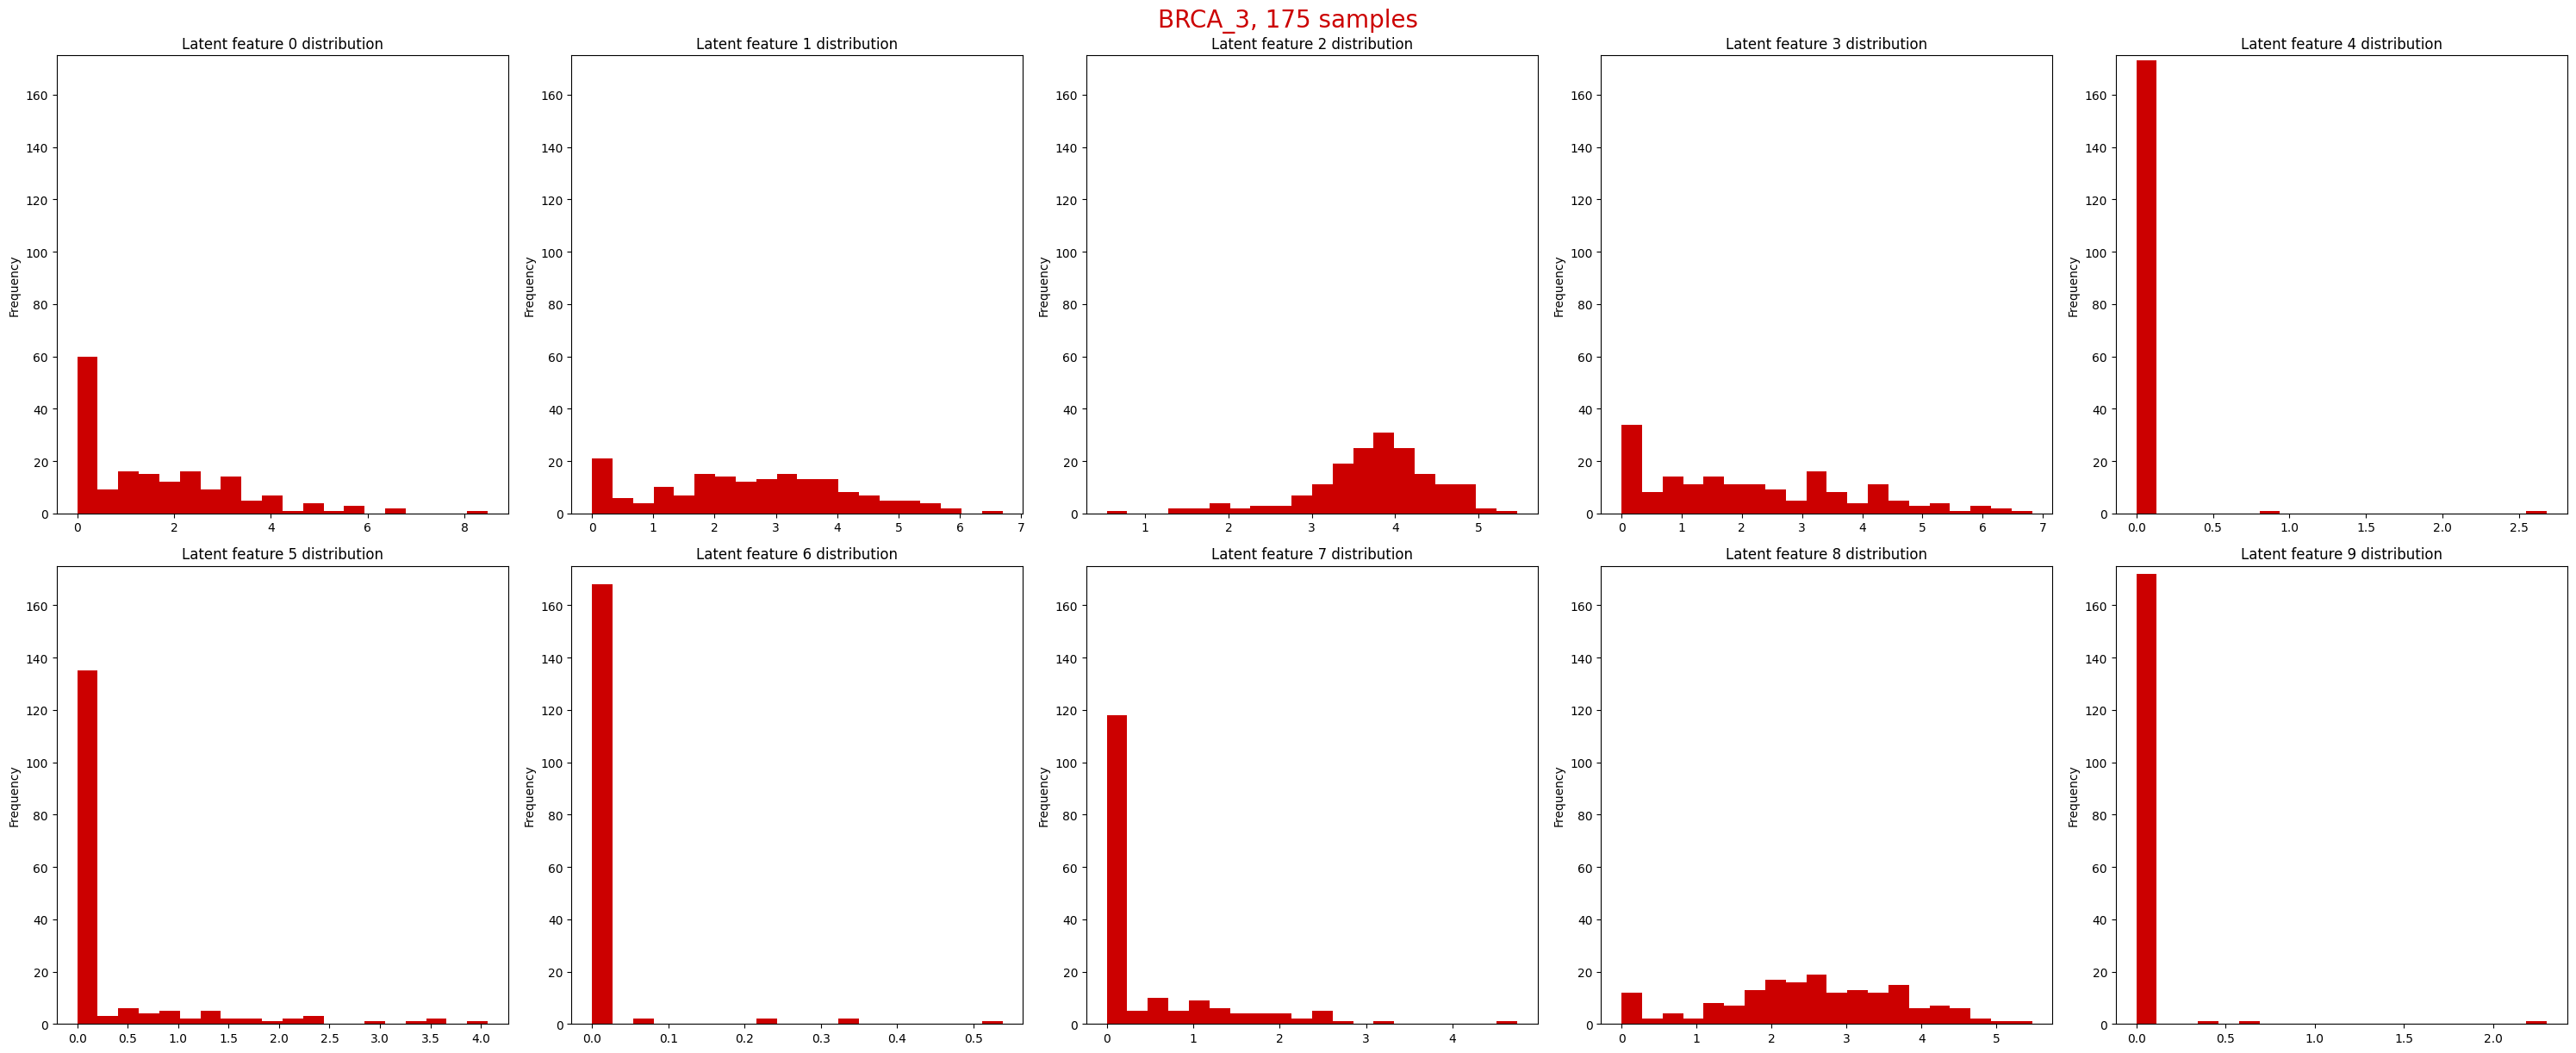

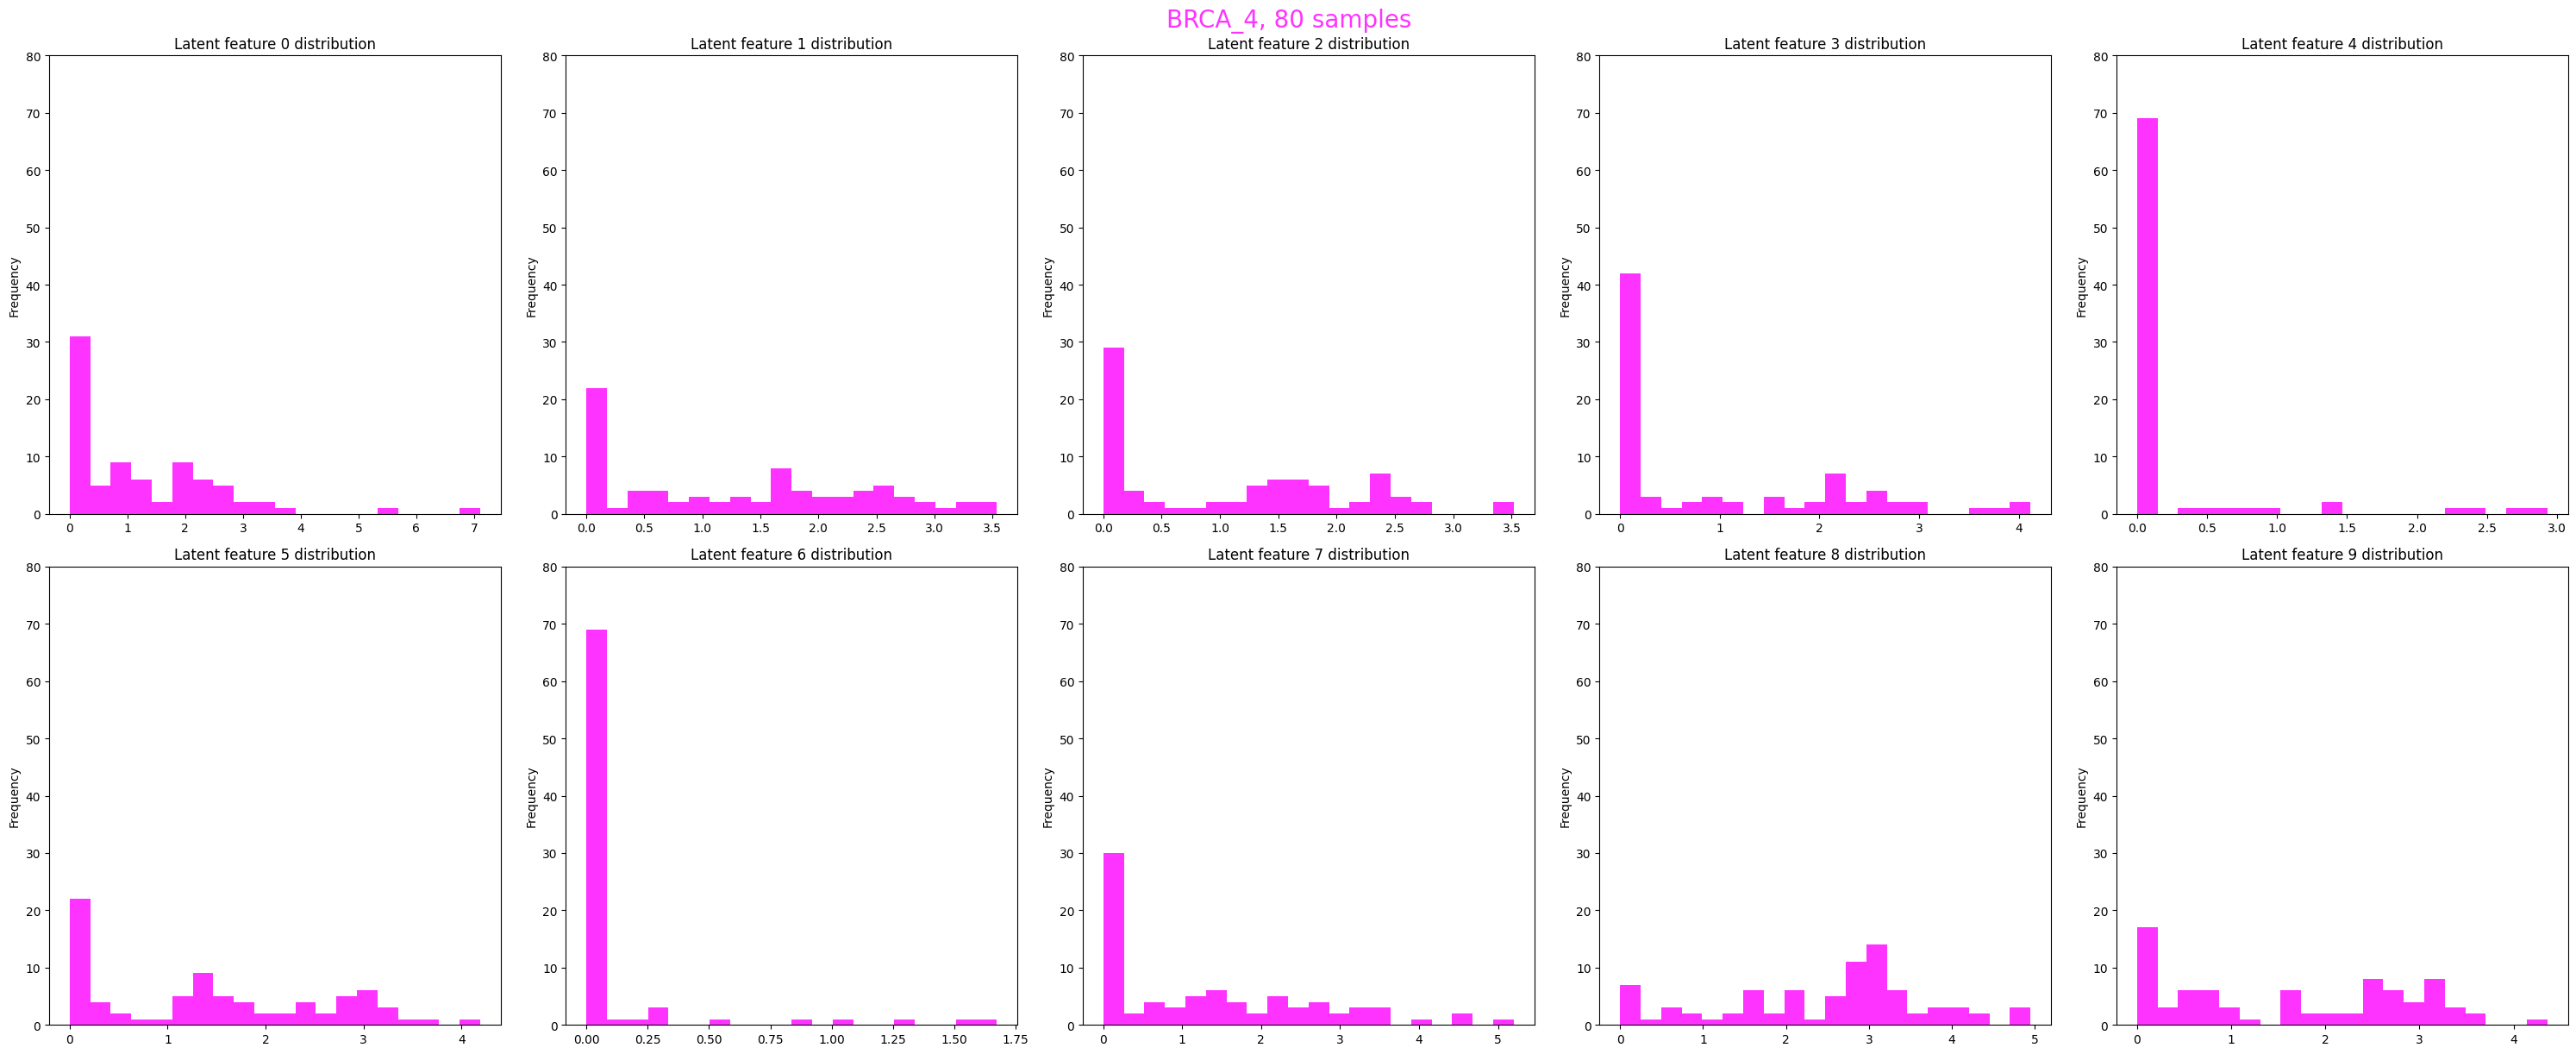

In [37]:
features = ['0','1','2','3','4', '5', '6', '7', '8', '9']
rows = 2
cols = 5

for ci, subtype in enumerate(sorted(lt_dm_10.Labels.unique())):
    print(subtype)
    fig=plt.figure(figsize=(30,12))
    # fig=plt.figure(figsize=(12,30)) # Vertical version
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        lt_dm_10[lt_dm_10.Labels == subtype][feature].plot.hist(bins=20,ax=ax,
                                                                facecolor=list(palette.values())[ci],
                                                                ylim = (0,len(lt_dm_10[lt_dm_10.Labels == subtype][feature])),
                                                                # xlim = lt_dm_10.iloc[:, 1:].max().max()
                                                               )
        ax.set_title('Latent feature '+feature+" distribution",color='black')

    fig.tight_layout()
    plt.suptitle(subtype+', '+str(len(lt_dm_10[lt_dm_10.Labels == subtype]))+' samples',
                 y = 1.015, fontsize = 20,
                 color = list(palette.values())[ci]
                )
    plt.savefig(subtype+'_10_dim_horz.png', bbox_inches = 'tight')
    # plt.show()

    # break

In [ ]:
# 2022-11-28, Monday morning, is the VAE biased toward over-represented subtypes?
# Compare individual subtype scores (?)
    # idea from setting normalized y axis

BRCA_1
BRCA_4
BRCA_2
BRCA_3


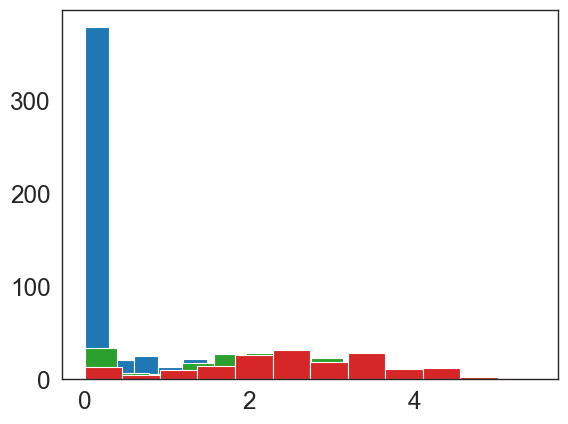

In [431]:
for subtype in lt_dm_10.Labels.unique():
    print(subtype)
    sub = lt_dm_10[lt_dm_10.Labels == subtype]
    plt.hist(sub['8'], bins = 12)

BRCA_1
BRCA_4
BRCA_2
BRCA_3


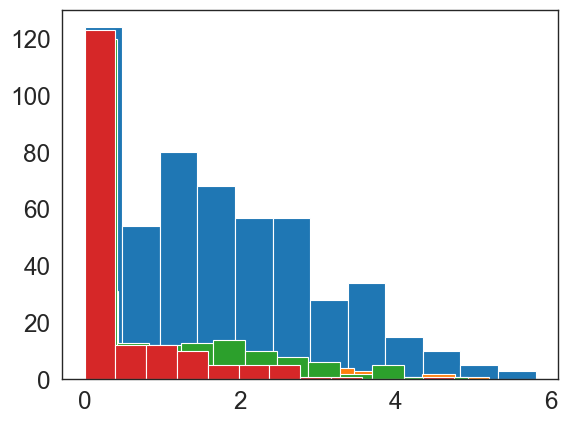

In [432]:
for subtype in lt_dm_10.Labels.unique():
    print(subtype)
    sub = lt_dm_10[lt_dm_10.Labels == subtype]
    plt.hist(sub['7'], bins = 12)

In [ ]:
# https://stackoverflow.com/questions/50773877/create-for-loop-to-plot-histograms-for-individual-columns-of-dataframe-with-seab
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,cols,i+1)
    dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
    ax.set_title(feature+" Distribution",color='red')

fig.tight_layout()  
plt.show()

In [ ]:
# Sample the latent feature distributions
For get ratio of zeros to sample size
Assign probability of zero to synth sample latent feature
If not zero, take value from range and density of remaining feature values

In [ ]:
# Super impostion plot
# This is a learning curve plot
inpt_dct = 



### Synthetic sample gen, devel  
- move to templates, records, or delete

#### Synth devel records

In [227]:
synth_devel_obj = pd.read_csv(
    'i_o/latent_feature_objects/BRCA_fit_on.BRCA_latent_object_latent_dim.100_epochs.155_mad_5k_within.tsv',
    sep = '\t', index_col = 0)

In [239]:
print(scipy.stats.moment(synth_devel_obj['0'], moment = 1))
print(scipy.stats.moment(synth_devel_obj['0'], moment = 2))
print(scipy.stats.moment(synth_devel_obj['0'], moment = 3))
print(scipy.stats.moment(synth_devel_obj['0'], moment = 4))

0.0
0.8275901941012755
1.3055455733023245
3.9941650942548432


In [240]:
col = '1'
print(scipy.stats.moment(synth_devel_obj[col], moment = 1))
print(scipy.stats.moment(synth_devel_obj[col], moment = 2))
print(scipy.stats.moment(synth_devel_obj[col], moment = 3))
print(scipy.stats.moment(synth_devel_obj[col], moment = 4))

0.0
0.6046237118707797
0.7471670533600777
2.141910538325585


In [246]:
mean(synth_devel_obj[synth_devel_obj.Labels == 'BRCA_1'][col])

0.8261080434448598

In [421]:
for subtype in synth_devel_obj.Labels.unique():
    print(subtype)
    sub = synth_devel_obj[synth_devel_obj.Labels == subtype]
    plt.hist(sub['11'], bins = 25)
    plt.close()

BRCA_1
BRCA_4
BRCA_2
BRCA_3


BRCA_1
BRCA_4
BRCA_2
BRCA_3


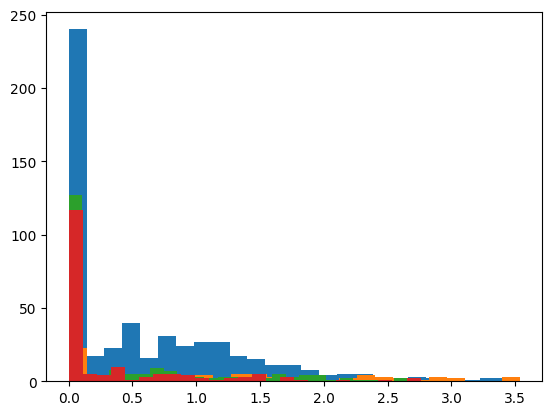

In [270]:
for subtype in synth_devel_obj.Labels.unique():
    print(subtype)
    sub = synth_devel_obj[synth_devel_obj.Labels == subtype]
    plt.hist(sub['11'], bins = 25)
    # break

In [272]:
pip install fitter

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 939.2 kB/s eta 0:00:00 0:00:01m
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=5687bbb298fe64f57a79ff4622386e0b337d0e6f2289618d91565d9da8a16b3b
  Stored in directory: /Users/karlberb/Library/Caches/pip/wheels/56/00/15/87e8ce355c5e9bf9b8e0983ab0fb62f3c1adc58e70d4e0a7e1
Successfully built fitter
Note: you may need to restart the kernel to use updated packages.


In [273]:
from fitter import Fitter, get_common_distributions, get_distributions

In [281]:
fit = Fitter.fit(sub.iloc[:, 1:])

AttributeError: 'DataFrame' object has no attribute 'distributions'

In [284]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


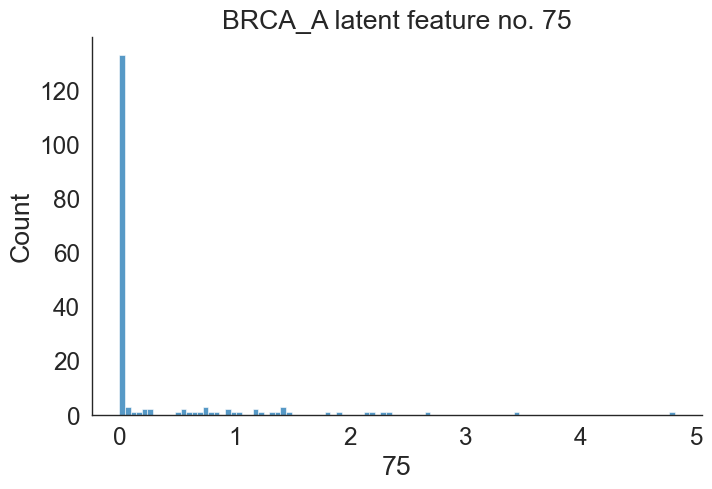

In [329]:
l_ft = '75'
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=sub, x=l_ft, kind="hist", bins = 100, aspect = 1.5) # 96 BRCA_1 associated
plt.title('BRCA_A latent feature no. '+
          l_ft)
plt.savefig(l_ft+'.png')

BRCA_3


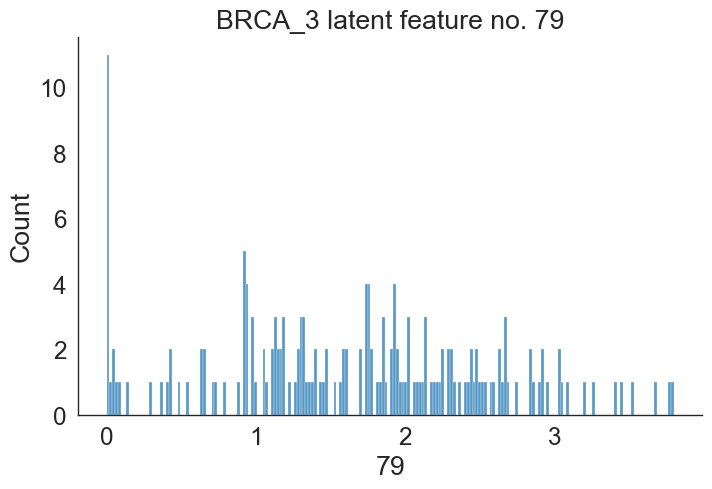

In [369]:
# for subtype in synth_devel_obj.Labels.unique():
for subtype in ['BRCA_3']:  
    print(subtype)
    sub = synth_devel_obj[synth_devel_obj.Labels == subtype]
    
    l_ft = '79'
    sns.set_style('white')
    sns.set_context("paper", font_scale = 2)
    sns.displot(data=sub, x=l_ft, kind="hist", bins = 200, aspect = 1.5) # 96 BRCA_1 associated
    plt.title(subtype+' latent feature no. '+
              l_ft)
    # plt.savefig(subtype+'_'+l_ft+'.png')
    # if subtype == 'BRCA_2'
    break

In [393]:
# https://stackoverflow.com/questions/7805552/fitting-a-histogram-with-python
import matplotlib.mlab as mlab

In [394]:
(mu, sigma) = norm.fit(sub.iloc[:, 1:])

In [406]:
mu

0.7009640735681428

In [407]:
sigma

1.0367145419857233

In [405]:
max(sub.iloc[:, 1:])

'99'

In [395]:
y = mlab.normpdf( bins, mu, sigma)

AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

In [398]:
from scipy.stats import norm.pdf()

SyntaxError: invalid syntax (3474737321.py, line 1)

In [399]:
from scipy.stats import norm.pdf

SyntaxError: invalid syntax (595504184.py, line 1)

In [400]:
from scipy.stats import norm

In [418]:
x_axis = np.arange(0, max(sub[l_ft][sub[l_ft] > 0]), 0.1)

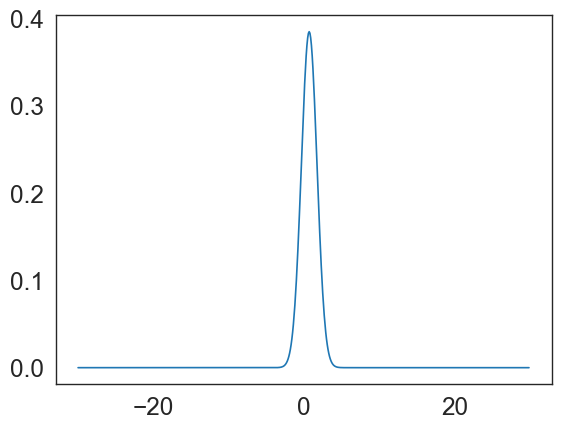

In [404]:
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma))

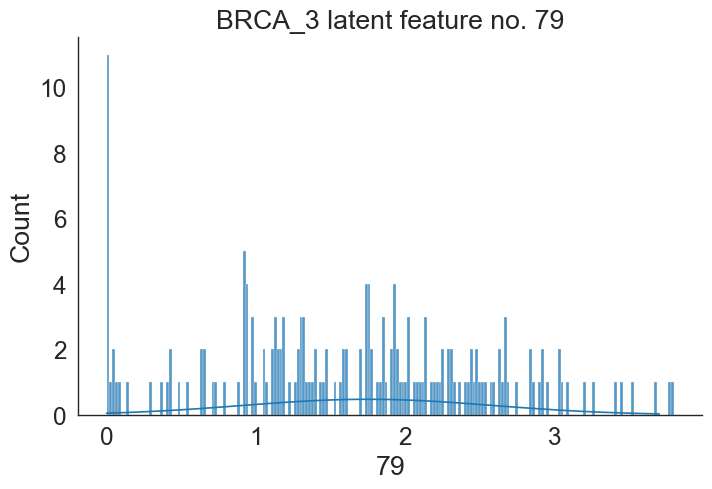

In [420]:
sns.displot(data=sub, x=l_ft, kind="hist", bins = 200, aspect = 1.5) # 96 BRCA_1 associated
plt.title(subtype+' latent feature no. '+
              l_ft)
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma))

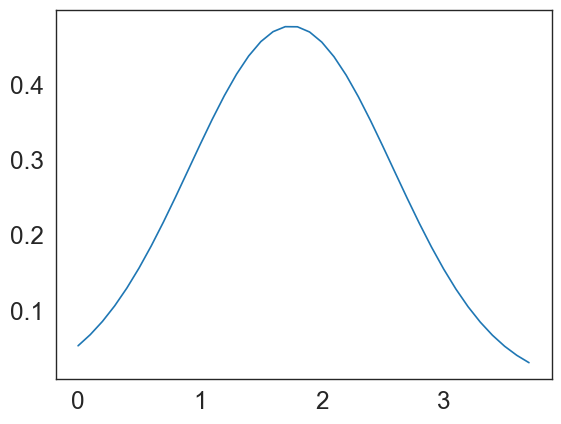

In [419]:
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma))

In [ ]:
x_axis = np.arange(0, max(sub[l_ft][sub[l_ft] > 0]), 0.1)

In [417]:
max(sub[l_ft][sub[l_ft] > 0])

3.7981637

In [414]:
(mu, sigma) = norm.fit(sub[l_ft][sub[l_ft] > 0])

In [415]:
mu

1.7477094281524392

In [416]:
sigma

0.8354494400636115

In [413]:
sub[l_ft][sub[l_ft] > 0]

BRCA
TCGA-A1-A0SK    0.915650
TCGA-A1-A0SO    0.933569
TCGA-A1-A0SP    2.659659
TCGA-A2-A04P    3.445944
TCGA-A2-A04Q    2.501151
                  ...   
TCGA-OL-A6VO    0.946075
TCGA-PL-A8LZ    2.143035
TCGA-S3-AA0Z    2.915075
TCGA-S3-AA10    1.373268
TCGA-S3-AA15    0.629134
Name: 79, Length: 164, dtype: float64

In [410]:
sub[l_ft]

BRCA
TCGA-A1-A0SK    0.915650
TCGA-A1-A0SO    0.933569
TCGA-A1-A0SP    2.659659
TCGA-A2-A04P    3.445944
TCGA-A2-A04Q    2.501151
                  ...   
TCGA-PL-A8LV    0.000000
TCGA-PL-A8LZ    2.143035
TCGA-S3-AA0Z    2.915075
TCGA-S3-AA10    1.373268
TCGA-S3-AA15    0.629134
Name: 79, Length: 175, dtype: float64

In [409]:
sub.loc[:, l_ft].stats(moments='mvsk')

AttributeError: 'Series' object has no attribute 'stats'

In [389]:
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [390]:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

True

In [391]:
r = norm.rvs(size=1000)

In [392]:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [387]:
type(norm)

scipy.stats._continuous_distns.norm_gen

In [372]:
sub[sub['79'] == 0]

,Labels,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
BRCA,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0D2,BRCA_3,0.000000,0.000000,0.000000,1.941363,1.189606,0.000000,2.831940,2.068757,0.000000,...,1.059698,1.673405,0.000000,2.694274,0.122956,0.000000,1.144928,0.000000,0.000000,0.000000
TCGA-A2-A25F,BRCA_3,0.000000,0.000000,0.000000,2.240153,0.855076,0.643707,0.000000,0.260133,0.762057,...,0.000000,0.000000,0.514522,0.556112,0.595643,0.000000,1.372540,1.465037,0.000000,1.212652
TCGA-A7-A26I,BRCA_3,0.383513,0.000000,0.000000,0.647524,4.710294,0.000000,0.000000,1.093157,0.000000,...,0.000000,0.233647,0.000000,1.429431,0.000000,0.000000,1.573499,1.133285,0.000000,0.000000
TCGA-AC-A2BK,BRCA_3,0.276504,0.000000,0.000000,2.035339,1.709840,0.000000,0.000000,1.146690,0.000000,...,0.638448,3.512018,0.000000,3.138951,0.663732,0.000000,0.855009,2.053906,0.000000,0.000000
TCGA-AC-A2QH,BRCA_3,0.000000,0.000000,0.000000,4.389088,1.444470,0.265539,3.815686,0.000000,0.000000,...,1.572699,4.894218,0.000000,0.000000,0.872385,0.000000,0.000000,0.000000,0.000000,0.000000
TCGA-AC-A7VC,BRCA_3,0.000000,0.674108,0.000000,4.188446,1.350661,4.503686,3.148538,1.038544,0.000000,...,2.386989,2.053699,0.000000,1.157421,1.110755,0.000000,0.000000,0.000000,0.013660,0.000000
TCGA-AC-A8OQ,BRCA_3,1.600256,1.247168,0.000000,0.510711,0.629260,0.000000,1.077249,2.790259,0.000000,...,1.856530,0.881263,0.417811,2.316997,0.163682,0.000000,1.217984,0.599849,0.000000,0.000000
TCGA-BH-A0E0,BRCA_3,1.019589,0.000000,0.631112,0.000000,2.270371,0.000000,0.000000,2.402304,0.000000,...,0.000000,0.041087,0.000000,0.000000,0.000000,0.000000,4.462541,0.000000,0.000000,0.000000
TCGA-BH-A1F6,BRCA_3,0.000000,1.659624,0.000000,0.867584,0.929477,0.055224,1.387677,3.080580,0.676576,...,0.617383,0.000000,0.000000,0.151138,0.629146,0.201089,2.896741,1.054227,1.490397,0.000000


In [282]:
f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])

NameError: name 'height' is not defined

In [280]:
fit[0]

TypeError: 'Fitter' object is not subscriptable

(array([326.,  74.,  44.,  38.,  14.,  17.,  11.,   5.,   3.,   3.]),
 array([0.        , 0.45186167, 0.90372334, 1.35558501, 1.80744668,
        2.25930835, 2.71117002, 3.16303169, 3.61489336, 4.06675503,
        4.5186167 ]),
 <BarContainer object of 10 artists>)

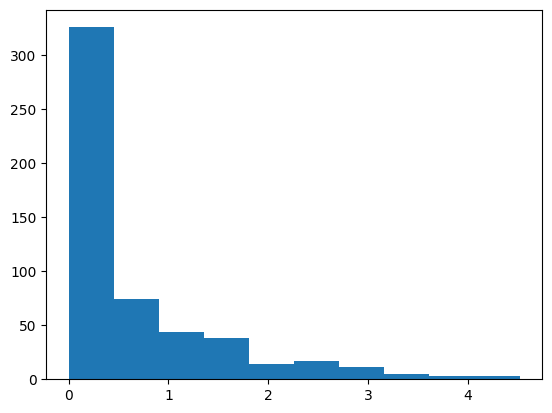

In [256]:
plt.hist(sub['0'])

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

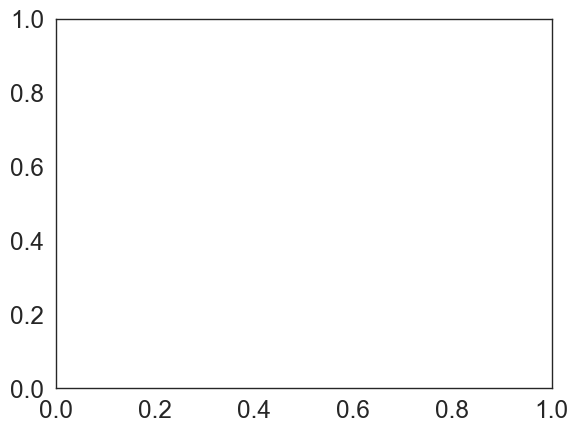

In [373]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [374]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

In [382]:
mean

array(0.)

In [383]:
var

array(1.)

In [384]:
skew

array(0.)

In [385]:
kurt

array(0.)

In [375]:
x = np.linspace(norm.ppf(0.01),
...                 norm.ppf(0.99), 100)

In [376]:
x

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

In [381]:
ax.plot(x, norm.pdf(x),
      'r-', lw=5, alpha=0.6, label='norm pdf')
# ax.show()

### Manuscript notes
Each sample in an encoded cancer cohort has a subtype associated with it so I'm subsetting the latent space by each subtype then sampling within that subtype set to generate synthetic samples of a known subtype

### Notes and template code:

In [ ]:
2022-11-22 v3 was first decoded learning curve plot
make two feature sets and two classifiers
then do a rational cross training
could also try a triple gradient of colors
    feature set, classifier, input / decoded 
    

In [ ]:
# This is the MAD5k taken across cohorts to facilitate transfer learning
# with normalization done within each cohort information leakage
nrm_wthn_pths = sorted(glob.glob('data_GEXP_5k_col_norm/*.tsv'))  

In [ ]:
fig, ax = plt.subplots()

In [ ]:
# Check that X and y match up:

In [ ]:
sorted(y.index)

In [ ]:
sorted(X.index)

In [ ]:
# Read big results matrix:


In [ ]:
# reject code:

        RF_F1_dct['mean'+str(j)] = mean(RF_output) # Take the stats on the tt loop
        RF_F1_dct['std'+str(j)] = stdev(RF_output)

    X = brca.iloc[:, 1:].sample(smp_sz)
    y = brca.loc[X.index, :]

In [ ]:
# First running average of standard deviation plot:

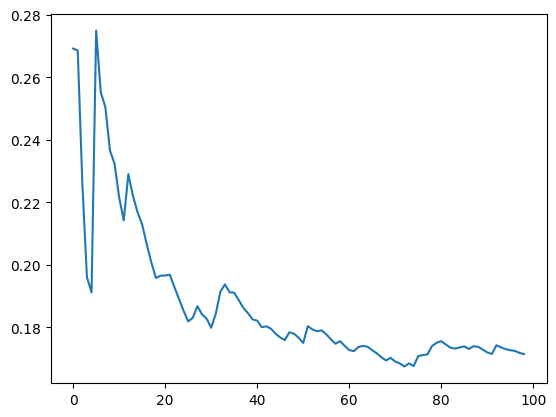

In [34]:
plt.plot(list(range(0, len(stdev_lst))),
        stdev_lst)